# Estratégia de concessão de crédito para venda de imóveis
	
A MRV tem buscado a criação de estratégias para aumento de vendas e, ao mesmo tempo, manter os índices de inadimplência reduzidos.

Seu papel é entender o comportamento da inadimplência histórica para apoiar sua gestão na melhor estratégia para a companhia na definição das políticas de crédito.
	
a) Com base nos Dados dispostos na aba "Banco de Dados", investigue o comportamento da inadimplência (IND INADIMPLENCIA). Quais conclusões você é capaz de afirmar?
	
b) Em quais situações temos os menores riscos de crédito e maiores riscos de crédito?
	
c) Por ordem de importância, quais seriam os fatores mais determinantes para comportamentos de inadimpência?

d) A companhia se beneficiaria de ter uma ferramenta que fosse capaz de discernir os clientes entre alto e baixo risco frente à inadimplência. Proponha a utilização de algum método para o problema em questão. Explique o passo a passo para a construção de tal solução de forma conceitual. Explique, também, como você validaria o seu funcionamento.

e) Imagine que a solução da questão anterior está pronta. Como você aplicaria ela no negócio? Como você alteraria processos para comportar a solução? Quais atitudes deveriam ser tomadas para cada tipo de cliente?

f) Além da solução proposta anteriormente, para melhorar o controle na gestão de concessão de crédito e para aprimorar a concessão de crédito da MRV, visando reduzir o Risco de Crédito, o que você, com suas experiências e habilidades, poderia fazer? Seja específico(a) na suas propostas de solução.
	
**Não há requisitos ferramentais para a elaboração e/ou apresentação do case. Utilize os recursos que irão gerar o melhor resultado e maximizar sua produtividade.**

## a) Com base nos Dados dispostos na aba "Banco de Dados", investigue o comportamento da inadimplência. Quais conclusões você é capaz de afirmar?

Características de inadimplentes

*   A renda média do cliente inadimplente é 18,15% menor que o não-inadimplente;
* A mediana da renda do cliente inadimplente é 7,82% menor que o não inadimplente;
*   A média da porcentagem do valor das parcelas na renda do cliente inadimplente é 15,79% maior que o não inadimplente;
* O valor médio das parcelas do cliente inadimplente é 6,18% maior que o não-inadimplente;
* Os clientes inadimplentes parecem tender a utilizar um pedaço maior do financiamento da MRV e de bancos (24% e 21% respectivamente) do que do FGTS e do sinal usado no pagamento do imóvel (17% e 12% respectivamente);
* A distribuição da renda dos clientes inadimplentes e não inadimplentes é bem parecida, porém, os clientes não inadimplentes possuem mais outliers;
* Clientes solteiros possuem o maior registro de transações na compra de um imóvel, e em número absoluto, possui o maior número de inadimplentes. Em relação ao todo, os clientes inadimplentes compõem 22% dos solteiros, só ficando atrás dos clientes divorciados, com 23%. Os clientes separados e casados ficam logo atrás com 21% e 19% respectivamente.
* As cidades com maior número absoluto de inadimplentes são São José do Rio Preto e Ribeirão Preto.

In [ ]:
!pip install -q lazypredict

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#packages  
import scipy.stats as stats 
from scipy.stats import mannwhitneyu, ttest_ind
import random
from IPython.core.display_trap import Any
# Imports
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import pandas as pd
from sklearn import datasets

import statsmodels.api as sm       
from statsmodels.formula.api import logit

In [ ]:
def percentage_increase(start_value, final_value):
    return round(((final_value - start_value) / start_value), 4) * 100

# Shapiro wilk - verificar se é normal
def is_normal_test(group):
    results = stats.shapiro(group)
    if results.pvalue < 0.05: return False
    return True
# equal variance test
def var_igual(group1, group2):
    results = stats.levene(group1.dropna(), group2.dropna())
    if results.pvalue < 0.05: return False
    return True

def t_test_ind(a: Any, b: Any, alpha: float = 0.0, null_hypothesis: str = None) -> str:
    # t-test for independent samples
    a = a.dropna()
    b = b.dropna()
    if is_normal_test(a) and is_normal_test(b):
        if var_igual(a, b):
            results = stats.ttest_ind(a=a, b=b)
        results = stats.ttest_ind(a, b, equal_var=False)
    results = mannwhitneyu(a, b)

    if float(results.pvalue) < alpha:
        return f'Nós rejeitamos a hipótese nula de que {null_hypothesis}'
    else:
        return f"Nós não podemos rejeitar a hipótese nula de que {null_hypothesis}"

def roc_auc_score_plot(y_test: Any, y_proba: Any):
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    roc_auc = auc(fpr, tpr)

    #Set default figure size
    plt.rcParams['figure.figsize'] = (8,8)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
url='https://drive.google.com/file/d/1bqFFmWx2HlHWfclMMZlmowrziB75Gd6u/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df.head()

,Ano da Venda do Imóvel,Estado Civil,Cidade,Renda Cliente,% FGTS usado como pagamento do imóvel,% SINAL usado como pagamento do imóvel,"% do imóvel, financiado pela MRV ao cliente","% do imóvel, financiado pelo Banco",Qtd parcelas de entrada (financiamento MRV),% Renda comprometido com a parcela de entrada financiamento MRV,Valor do Imóvel,IND INADIMPLENCIA
0,2017,Divorciado,Ribeirão Preto,3.27,4%,1%,14%,82%,33,16%,134.02,NÃO
1,2014,Solteiro,Joinville,2.15,8%,0%,10%,82%,23,24%,130.28,SIM
2,2017,Solteiro,UBERABA,2.04,0%,18%,4%,78%,45,6%,140.18,NÃO
3,2015,Solteiro,São Paulo,6.35,8%,2%,10%,79%,30,11%,201.02,SIM
4,2016,Solteiro,Salvador,2.41,1%,1%,9%,89%,36,13%,146.67,NÃO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12672 entries, 0 to 12671
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Ano da Venda do Imóvel                                           12672 non-null  int64  
 1   Estado Civil                                                     12672 non-null  object 
 2   Cidade                                                           12672 non-null  object 
 3   Renda Cliente                                                    12632 non-null  float64
 4   % FGTS usado como pagamento do imóvel                            12672 non-null  object 
 5   % SINAL usado como pagamento do imóvel                           12672 non-null  object 
 6   % do imóvel, financiado pela MRV ao cliente                      12672 non-null  object 
 7   % do imóvel, financiado pelo Banco      

In [ ]:
df.columns = [
    "ano_venda",
    "estado_civil",
    'cidade',
    'renda_cliente',
    'fgts_imovel',
    'sinal_imovel',
    'mrv_imovel',
    'banco_imovel',
    'parcelas_entradas',
    'renda_parcela_entrada',
    'valor_imovel',
    'inadimplencia'
]

In [ ]:
df.head()

,ano_venda,estado_civil,cidade,renda_cliente,fgts_imovel,sinal_imovel,mrv_imovel,banco_imovel,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia
0,2017,Divorciado,Ribeirão Preto,3.27,4%,1%,14%,82%,33,16%,134.02,NÃO
1,2014,Solteiro,Joinville,2.15,8%,0%,10%,82%,23,24%,130.28,SIM
2,2017,Solteiro,UBERABA,2.04,0%,18%,4%,78%,45,6%,140.18,NÃO
3,2015,Solteiro,São Paulo,6.35,8%,2%,10%,79%,30,11%,201.02,SIM
4,2016,Solteiro,Salvador,2.41,1%,1%,9%,89%,36,13%,146.67,NÃO


In [ ]:
df[["renda_cliente", "valor_imovel"]] = df[["renda_cliente", "valor_imovel"]].apply(lambda x: x * 1000, axis=1)

In [ ]:
df.head()

,ano_venda,estado_civil,cidade,renda_cliente,fgts_imovel,sinal_imovel,mrv_imovel,banco_imovel,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia
0,2017,Divorciado,Ribeirão Preto,3268.00,4%,1%,14%,82%,33,16%,134017.00,NÃO
1,2014,Solteiro,Joinville,2154.00,8%,0%,10%,82%,23,24%,130284.00,SIM
2,2017,Solteiro,UBERABA,2039.00,0%,18%,4%,78%,45,6%,140184.00,NÃO
3,2015,Solteiro,São Paulo,6349.00,8%,2%,10%,79%,30,11%,201016.00,SIM
4,2016,Solteiro,Salvador,2413.00,1%,1%,9%,89%,36,13%,146673.00,NÃO


In [ ]:
px.line(df.groupby('ano_venda').valor_imovel.sum().reset_index(), x='ano_venda', y='valor_imovel')

In [ ]:
df_inad_by_ec = df.groupby(["estado_civil", "inadimplencia"]).agg(inadimplencia_count = ("inadimplencia","count")).reset_index()

In [ ]:
px.bar(df_inad_by_ec, x="estado_civil", y="inadimplencia_count", color="inadimplencia")

Solteiros: 22% de inadimplentes

Casados: 19% de inadimplentes

Divorciados: 23% de inadimplentes

Separados: 21% de inadimplentes

Viúvos: 8% de inadimplentes

In [ ]:
df_city_inad = df.groupby(["cidade", "inadimplencia"]).agg(inadimplencia_count = ("inadimplencia","count")).reset_index()

In [ ]:
df_inad_yes = df_city_inad[df_city_inad.inadimplencia == "SIM"]

In [ ]:
px.box(df_inad_yes, y="inadimplencia_count", hover_name="cidade")

In [ ]:
sem_inadimplencia = df_city_inad[df_city_inad.inadimplencia == "NÃO"][["cidade", "inadimplencia_count"]].rename(columns={"inadimplencia_count":"NAO"})
com_inadimplencia = df_city_inad[df_city_inad.inadimplencia == "SIM"][["cidade", "inadimplencia_count"]].rename(columns={"inadimplencia_count":"SIM"})

In [ ]:
inadimplencia_per_city = sem_inadimplencia.merge(com_inadimplencia, on="cidade").set_index("cidade")

In [ ]:
px.bar(inadimplencia_per_city.apply(lambda x: x/sum(x) * 100, axis=1)\
       .reset_index().sort_values(by="SIM", ascending=False), 
       x="cidade", y=["SIM", "NAO"])

In [ ]:
px.bar(df_city_inad[df_city_inad.inadimplencia == "SIM"].sort_values(by="inadimplencia_count", ascending=False), 
       x="cidade", 
       y="inadimplencia_count")

In [ ]:
df.describe()

,ano_venda,renda_cliente,parcelas_entradas,valor_imovel
count,12672.00,12632.00,12672.00,12672.00
mean,2015.54,3622.06,27.62,151496.13
std,1.15,23243.19,13.85,28404.92
min,2014.00,1000.00,0.00,99000.00
25%,2014.00,1865.00,23.00,135168.00
50%,2016.00,2275.00,30.00,145000.00
75%,2017.00,3259.00,35.00,161533.00
max,2017.00,997000.00,60.00,711229.00


In [ ]:
px.violin(df, y="renda_cliente", color="inadimplencia", box=True)

In [ ]:
def transform_percentage_in_number(df_transformed, columns_list, column_times, new_columns_list):
    df_transformed[columns_list] = df_transformed[columns_list].apply(lambda x: x.str[:-1]\
                                              .apply(lambda number: \
                                                float(number) / 100), axis=1)
    
    df_transformed[new_columns_list] = df_transformed[columns_list].apply(lambda x: x * df_transformed[column_times])
    return df_transformed.drop(columns_list, axis=1)

In [ ]:
transform_percentage_in_number(df, 
                               columns_list=["fgts_imovel", "sinal_imovel", 
                                             "mrv_imovel", "banco_imovel"],
                               column_times="valor_imovel",
                               new_columns_list=["fgts_value", "sinal_value", "mrv_value", "banco_value"])

,ano_venda,estado_civil,cidade,renda_cliente,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia,fgts_value,sinal_value,mrv_value,banco_value
0,2017,Divorciado,Ribeirão Preto,3268.00,33,16%,134017.00,NÃO,5360.68,1340.17,18762.38,109893.94
1,2014,Solteiro,Joinville,2154.00,23,24%,130284.00,SIM,10422.72,0.00,13028.40,106832.88
2,2017,Solteiro,UBERABA,2039.00,45,6%,140184.00,NÃO,0.00,25233.12,5607.36,109343.52
3,2015,Solteiro,São Paulo,6349.00,30,11%,201016.00,SIM,16081.28,4020.32,20101.60,158802.64
4,2016,Solteiro,Salvador,2413.00,36,13%,146673.00,NÃO,1466.73,1466.73,13200.57,130538.97
...,...,...,...,...,...,...,...,...,...,...,...,...
12667,2016,Solteiro,São Caetano do Sul,7142.00,23,11%,241250.00,NÃO,41012.50,7237.50,19300.00,173700.00
12668,2015,Solteiro,Serra,1697.00,36,13%,126464.00,NÃO,2529.28,1264.64,8852.48,113817.60
12669,2016,Solteiro,Nilópolis,2600.00,36,16%,145815.00,NÃO,5832.60,0.00,14581.50,125400.90
12670,2017,Solteiro,Botucatu,1552.00,13,43%,122000.00,NÃO,3660.00,0.00,9760.00,108580.00


In [ ]:
df.drop(["fgts_imovel", "sinal_imovel", 
        "mrv_imovel", "banco_imovel"], axis=1, inplace=True)

In [ ]:
df.head()

,ano_venda,estado_civil,cidade,renda_cliente,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia,fgts_value,sinal_value,mrv_value,banco_value
0,2017,Divorciado,Ribeirão Preto,3268.00,33,16%,134017.00,NÃO,5360.68,1340.17,18762.38,109893.94
1,2014,Solteiro,Joinville,2154.00,23,24%,130284.00,SIM,10422.72,0.00,13028.40,106832.88
2,2017,Solteiro,UBERABA,2039.00,45,6%,140184.00,NÃO,0.00,25233.12,5607.36,109343.52
3,2015,Solteiro,São Paulo,6349.00,30,11%,201016.00,SIM,16081.28,4020.32,20101.60,158802.64
4,2016,Solteiro,Salvador,2413.00,36,13%,146673.00,NÃO,1466.73,1466.73,13200.57,130538.97


In [ ]:
df_inad_value = df.groupby(["inadimplencia"]).agg({
    "fgts_value":"sum",
    "mrv_value":"sum",
    "banco_value":"sum",
    "sinal_value":"sum"
}).T

In [ ]:
df_inad_value.reset_index()

inadimplencia,index,NÃO,SIM
0,fgts_value,57966189.14,12003166.01
1,mrv_value,162855752.61,51795739.20
2,banco_value,1233248737.87,346059519.58
3,sinal_value,50009943.64,7236379.91


In [ ]:
df_inad_value.apply(lambda x: x/sum(x) * 100, axis=1)

inadimplencia,NÃO,SIM
fgts_value,82.85,17.15
mrv_value,75.87,24.13
banco_value,78.09,21.91
sinal_value,87.36,12.64


In [ ]:
px.bar(df_inad_value.apply(lambda x: x/sum(x) * 100, axis=1).reset_index(), x="index", y=["SIM", "NÃO"])

In [ ]:
df.head()

,ano_venda,estado_civil,cidade,renda_cliente,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia,fgts_value,sinal_value,mrv_value,banco_value
0,2017,Divorciado,Ribeirão Preto,3268.00,33,16%,134017.00,NÃO,5360.68,1340.17,18762.38,109893.94
1,2014,Solteiro,Joinville,2154.00,23,24%,130284.00,SIM,10422.72,0.00,13028.40,106832.88
2,2017,Solteiro,UBERABA,2039.00,45,6%,140184.00,NÃO,0.00,25233.12,5607.36,109343.52
3,2015,Solteiro,São Paulo,6349.00,30,11%,201016.00,SIM,16081.28,4020.32,20101.60,158802.64
4,2016,Solteiro,Salvador,2413.00,36,13%,146673.00,NÃO,1466.73,1466.73,13200.57,130538.97


In [ ]:
df["valor_parcelas"] = df["mrv_value"]/df["parcelas_entradas"]

In [ ]:
df["renda_parcela_entrada"] = df.renda_parcela_entrada.str[:-1].apply(lambda value: float(value)/100)

In [ ]:
df.head()

,ano_venda,estado_civil,cidade,renda_cliente,parcelas_entradas,renda_parcela_entrada,valor_imovel,inadimplencia,fgts_value,sinal_value,mrv_value,banco_value,valor_parcelas
0,2017,Divorciado,Ribeirão Preto,3268.00,33,0.16,134017.00,NÃO,5360.68,1340.17,18762.38,109893.94,568.56
1,2014,Solteiro,Joinville,2154.00,23,0.24,130284.00,SIM,10422.72,0.00,13028.40,106832.88,566.45
2,2017,Solteiro,UBERABA,2039.00,45,0.06,140184.00,NÃO,0.00,25233.12,5607.36,109343.52,124.61
3,2015,Solteiro,São Paulo,6349.00,30,0.11,201016.00,SIM,16081.28,4020.32,20101.60,158802.64,670.05
4,2016,Solteiro,Salvador,2413.00,36,0.13,146673.00,NÃO,1466.73,1466.73,13200.57,130538.97,366.68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12672 entries, 0 to 12671
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano_venda              12672 non-null  int64  
 1   estado_civil           12672 non-null  object 
 2   cidade                 12672 non-null  object 
 3   renda_cliente          12632 non-null  float64
 4   parcelas_entradas      12672 non-null  int64  
 5   renda_parcela_entrada  12672 non-null  float64
 6   valor_imovel           12672 non-null  float64
 7   inadimplencia          12672 non-null  object 
 8   fgts_value             12672 non-null  float64
 9   sinal_value            12672 non-null  float64
 10  mrv_value              12672 non-null  float64
 11  banco_value            12672 non-null  float64
 12  valor_parcelas         11868 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
df["valor_parcelas"] = df.valor_parcelas.replace(np.nan, 0)
df["valor_parcelas"] = df.valor_parcelas.replace(np.inf, 0)

In [ ]:
df.groupby(["inadimplencia"]).valor_parcelas.mean()

inadimplencia
NÃO   572.85
SIM   611.29
Name: valor_parcelas, dtype: float64

In [ ]:
df.groupby("inadimplencia").renda_parcela_entrada.mean()

inadimplencia
NÃO   0.19
SIM   0.23
Name: renda_parcela_entrada, dtype: float64

In [ ]:
df.groupby("inadimplencia").renda_cliente.median()

inadimplencia
NÃO   2314.00
SIM   2133.00
Name: renda_cliente, dtype: float64

In [ ]:
t_test_ind(df[df["inadimplencia"]  == "SIM"].renda_cliente, 
           df[df["inadimplencia"] == "NÃO"].renda_cliente,
           alpha=0.05,
null_hypothesis="não há uma diferença entre a renda do cliente inadimplente e não inadimplente.")

'Nós rejeitamos a hipótese nula de que não há uma diferença entre a renda do cliente inadimplente e não inadimplente.'

In [ ]:
t_test_ind(df[df["inadimplencia"]  == "SIM"].valor_parcelas, 
           df[df["inadimplencia"] == "NÃO"].valor_parcelas,
           alpha=0.05,
           null_hypothesis="não há uma diferença entre as médias de parcelas do cliente inadimplente e não inadimplente.")

'Nós rejeitamos a hipótese nula de que não há uma diferença entre as médias de parcelas do cliente inadimplente e não inadimplente.'

In [ ]:
t_test_ind(df[df["inadimplencia"]  == "SIM"].renda_parcela_entrada, 
           df[df["inadimplencia"] == "NÃO"].renda_parcela_entrada,
           alpha=0.05,
           null_hypothesis="não há uma diferença entre a porcentagem da parcela da renda do cliente inadimplente e não inadimplente.")

'Nós rejeitamos a hipótese nula de que não há uma diferença entre a porcentagem da parcela da renda do cliente inadimplente e não inadimplente.'

In [ ]:
t_test_ind(df[df["inadimplencia"]  == "SIM"].renda_cliente, 
           df[df["inadimplencia"] == "NÃO"].renda_cliente,
           alpha=0.05,
null_hypothesis="não há uma diferença entre a renda do cliente inadimplente e não inadimplente.")

'Nós rejeitamos a hipótese nula de que não há uma diferença entre a renda do cliente inadimplente e não inadimplente.'

In [ ]:
df[df["inadimplencia"] == "SIM"].groupby("ano_venda").mrv_value.sum()

ano_venda
2014   15907027.71
2015   14472234.59
2016   11041120.12
2017   10375356.78
Name: mrv_value, dtype: float64

## b) Em quais situações temos os menores riscos de crédito e maiores riscos de crédito?

* Não há nenhuma correlação linear significativa entre as variáveis e se determinado cliente está inadimplente ou não;
* Mesmo utilizando uma correlação que leve em conta dados categóricos, não há nenhuma grande correlação entre as variáveis independentes e a dependente.
* Quanto maior o valor do sinal ou a renda do cliente, menor a tendência à inadimplência.
* Quanto maior o valor concedido pela MRV ao cliente, o tamanho das parcelas ou a porcentagem de renda que uma parcela vai consumir, maior a tendência à inadimplência;

In [ ]:
df["inadimplencia_cat"] = df.inadimplencia.apply(lambda x: 1 if x == "SIM" else 0)

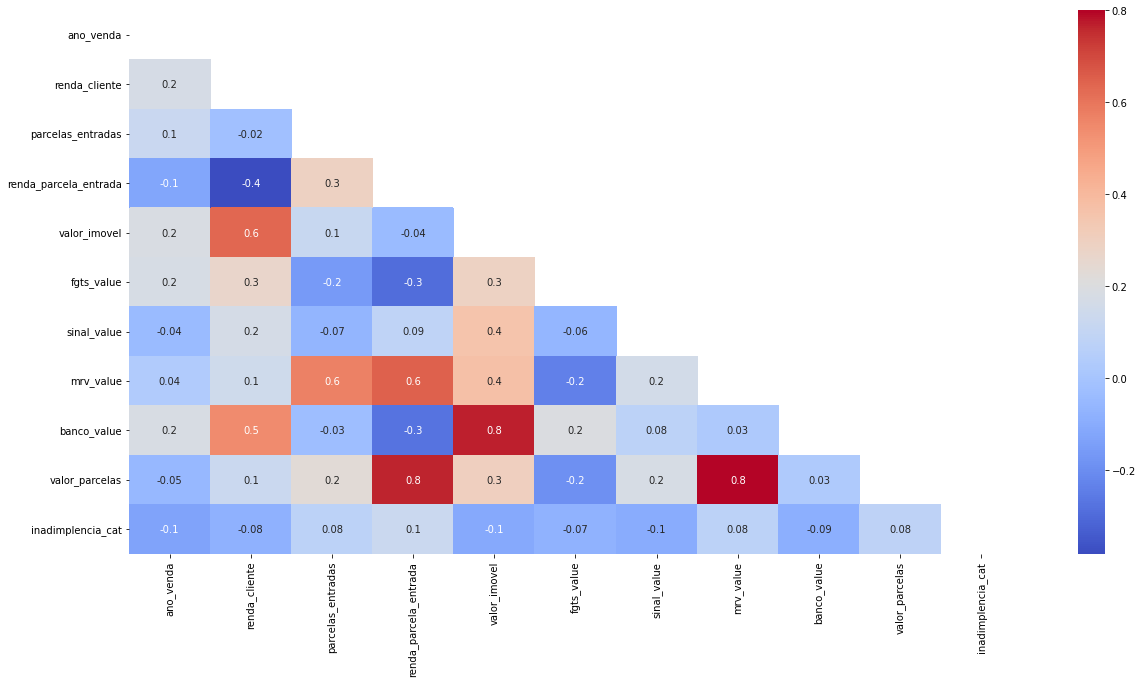

In [ ]:
corr_matrix = df.corr(method="spearman")
matrix = np.triu(corr_matrix)
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
plot = sns.heatmap(corr_matrix, cmap="coolwarm", annot = True, fmt=".1g", mask=matrix)
plot

In [ ]:
import scipy.stats as ss

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
!pip install -q phik

     |████████████████████████████████| 679 kB 5.4 MB/s 


In [ ]:
from phik import resources, report

interval columns not set, guessing: ['ano_venda', 'renda_cliente', 'parcelas_entradas', 'renda_parcela_entrada', 'valor_imovel', 'fgts_value', 'sinal_value', 'mrv_value', 'banco_value', 'valor_parcelas', 'inadimplencia_cat']


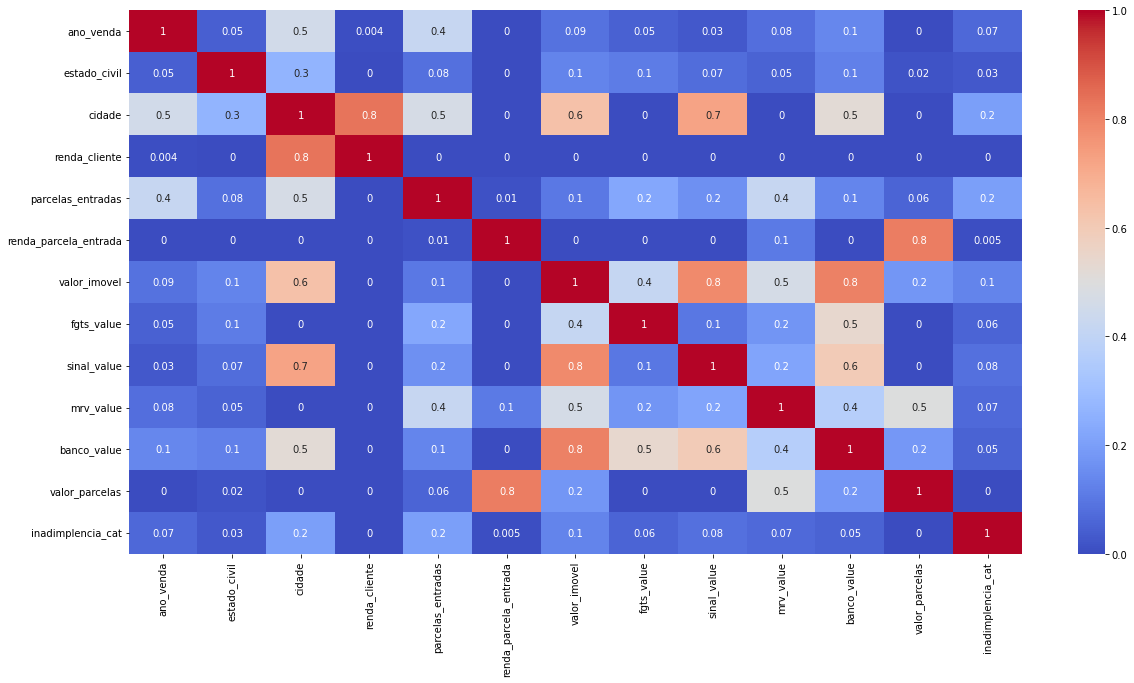

In [ ]:
corr_matrix = df.drop("inadimplencia", axis=1).phik_matrix()
matrix = np.triu(corr_matrix)
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
plot = sns.heatmap(corr_matrix, cmap="coolwarm", annot = True, fmt=".1g")
plot

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
    return newDF, woeDF

In [ ]:
newdf, woedf = iv_woe(df.drop("inadimplencia", axis=1), target="inadimplencia_cat", show_woe=True)

Rules for IV (Information Value)

- Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)

- 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio

- 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio

- 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.

- 0.5, suspicious relationship (Check once)

In [ ]:
woedf

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,ano_venda,2014,3234,943,0.33,2291,0.23,0.35,0.04
1,ano_venda,2015,2927,771,0.27,2156,0.22,0.21,0.01
2,ano_venda,2016,2912,558,0.20,2354,0.24,-0.20,0.01
3,ano_venda,2017,3599,567,0.20,3032,0.31,-0.43,0.05
0,estado_civil,Casado,1980,388,0.14,1592,0.16,-0.17,0.00
...,...,...,...,...,...,...,...,...,...
4,valor_parcelas,"(532.526, 608.526]",1267,336,0.12,931,0.09,0.22,0.01
5,valor_parcelas,"(608.526, 690.964]",1267,326,0.11,941,0.10,0.18,0.00
6,valor_parcelas,"(690.964, 790.793]",1267,322,0.11,945,0.10,0.17,0.00
7,valor_parcelas,"(790.793, 945.217]",1267,321,0.11,946,0.10,0.16,0.00


In [ ]:
print(newdf)

                Variable   IV
0              ano_venda 0.10
0           estado_civil 0.01
0                 cidade 0.31
0          renda_cliente 0.06
0      parcelas_entradas 0.14
0  renda_parcela_entrada 0.14
0           valor_imovel 0.10
0             fgts_value 0.05
0            sinal_value 0.15
0              mrv_value 0.20
0            banco_value 0.08
0         valor_parcelas 0.08


Nenhuma feature possui uma forte correlação com a target, sendo no máximo uma relação média entre a variável target.

In [ ]:
woedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variable         727 non-null    object 
 1   Cutoff           727 non-null    object 
 2   N                727 non-null    int64  
 3   Events           727 non-null    int64  
 4   % of Events      727 non-null    float64
 5   Non-Events       727 non-null    int64  
 6   % of Non-Events  727 non-null    float64
 7   WoE              727 non-null    float64
 8   IV               727 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 56.8+ KB


In [ ]:
woedf.Cutoff = woedf.Cutoff.astype('str')

In [ ]:
## Acima de 0 são para clientes inadimplentes, abaixo de zero para clientes não inadimplentes

In [ ]:
px.bar(woedf[woedf.Variable == "renda_parcela_entrada"], x="Cutoff", y="WoE")

In [ ]:
px.bar(woedf[woedf.Variable == "renda_cliente"], x="Cutoff", y="WoE")

In [ ]:
px.bar(woedf[woedf.Variable == "sinal_value"], x="Cutoff", y="WoE")

In [ ]:
px.bar(woedf[woedf.Variable == "parcelas_entradas"], x="Cutoff", y="WoE")

In [ ]:
px.bar(woedf[woedf.Variable == "mrv_value"], x="Cutoff", y="WoE")

In [ ]:
px.bar(woedf[woedf.Variable == "cidade"].sort_values(by="WoE", ascending=False), x="Cutoff", y="WoE")

## c) Por ordem de importância, quais seriam os fatores mais determinantes para comportamentos de inadimplência?

In [ ]:
newdf.sort_values(by="IV", ascending=False)

,Variable,IV
0,cidade,0.31
0,mrv_value,0.20
0,sinal_value,0.15
0,parcelas_entradas,0.14
0,renda_parcela_entrada,0.14
0,ano_venda,0.10
0,valor_imovel,0.10
0,banco_value,0.08
0,valor_parcelas,0.08
0,renda_cliente,0.06


## d) A companhia se beneficiaria de ter uma ferramenta que fosse capaz de discernir os clientes entre alto e baixo risco frente à inadimplência. Proponha a utilização de algum método para o problema em questão. Explique o passo a passo para a construção de tal solução de forma conceitual. Explique, também, como você validaria o seu funcionamento.

O método para a resolução do problema é a criação de um modelo de machine learning que estima a probabilidade de um determinado cliente cometer inadimplência. 

- A partir dessa distribuição, vamos estipular um threshold para pensar estratégias que visem diminuir o risco de inadimplência desse cliente.

- A maioria dos modelos de classificação possui um threshold padrão de 0,5. Portanto, um cliente com 0,5 ou mais de probabilidade, será considerado como possível inadimplente. O problema desse threshold é que ele é muito baixo. As estratégias mencionadas acima gastam recursos valiosos da empresa, portanto, eles deverão ser gastos em um cenário de maior certeza.

- O modelo baseline utilizado será o de Regressão Logística. Outros modelos também podem ser utilizados, com melhores dados.

- Como os dados são desbalanceados, utilizaremos a técnica de undersampling, que consiste em diminuir os dados da classe com mais registros (não-inadimplentes) com o intuito de aproximar esses dados ao patamar da classe com menos registros (inadimplentes). A técnica de oversampling (que o contrário da undersampling) pode ser perigosa, quando lidamos com altos valores de investimento no problema atacado, pois ela visa criar dados fictícios através dos dados disponíveis. Dados fictícios podem prejudicar a performance do modelo.

- A modelagem utilizará os anos como forma de dividir os dados entre treino e teste, sendo 3 anos de treino e 1 ano de teste, ou dois anos de treino, 1 ano de validação e um ano de teste. Essa abordagem é importante porque os dados tem uma dimensão anual. Sendo assim, na vida real não conseguiríamos ter dados de um ano que ainda não ocorreu.

Os dados serão validados com o/s último/s ano/s disponível/is.

Com esse modelo baseline, utilizando um threshold de 75% de probabilidade, ele seria responsável por uma economia de mais de 3 milhões e 800 mil reais para a MRV, o que daria, aproximadamente, 37% do valor gasto com inadimplentes no ano de 2017.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12672 entries, 0 to 12671
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano_venda              12672 non-null  int64  
 1   estado_civil           12672 non-null  object 
 2   cidade                 12672 non-null  object 
 3   renda_cliente          12632 non-null  float64
 4   parcelas_entradas      12672 non-null  int64  
 5   renda_parcela_entrada  12672 non-null  float64
 6   valor_imovel           12672 non-null  float64
 7   inadimplencia          12672 non-null  object 
 8   fgts_value             12672 non-null  float64
 9   sinal_value            12672 non-null  float64
 10  mrv_value              12672 non-null  float64
 11  banco_value            12672 non-null  float64
 12  valor_parcelas         12672 non-null  float64
 13  inadimplencia_cat      12672 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.4+ 

In [ ]:
def column_into_woe(df: Any, column: str = None, target: str = None) -> pd.Series:
    data_df = df[[column, target]].copy()

    newdf, woedf = iv_woe(data_df, target=target)
    woe_data = woedf[woedf["Variable"] == column][["Cutoff", "WoE"]]
    woe_dict = woedf.set_index('Cutoff').to_dict()['WoE']

    return data_df[column].apply(lambda x:  woe_dict[x])

### Modelagem com somente colunas numéricas

In [ ]:
X_train = df[df["ano_venda"] < 2017].drop(["inadimplencia", "inadimplencia_cat"], axis=1).replace(np.nan, 0)
y_train = df[df["ano_venda"] < 2017]["inadimplencia_cat"]

X_test = df[df["ano_venda"] == 2017].drop(["inadimplencia", "inadimplencia_cat"], axis=1)
y_test = df[df["ano_venda"] == 2017]["inadimplencia_cat"]

In [ ]:
X_features = [
    "renda_cliente",
    "parcelas_entradas",
    "renda_parcela_entrada",
    "valor_imovel",
    "fgts_value",
    "sinal_value",
    "mrv_value",
    "banco_value",
    "valor_parcelas"
]

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train[X_features], y_train)

y_pred = lr.predict(X_test[X_features])
pred_proba = lr.predict_proba(X_test[X_features])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3032
           1       1.00      0.00      0.00       567

    accuracy                           0.84      3599
   macro avg       0.92      0.50      0.46      3599
weighted avg       0.87      0.84      0.77      3599



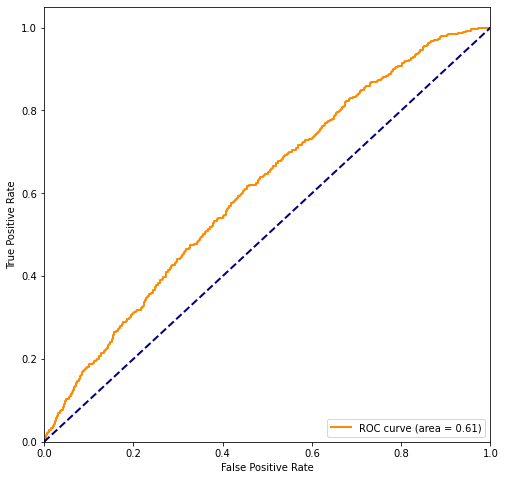

In [ ]:
roc_auc_score_plot(y_test, pred_proba)

In [ ]:
train_df = pd.concat([X_train[X_features], y_train], axis=1)

In [ ]:
formula = """inadimplencia_cat ~ renda_cliente + parcelas_entradas + 
            renda_parcela_entrada + valor_imovel + fgts_value + sinal_value
            + mrv_value + banco_value + valor_parcelas"""

logit_model = logit(formula, data = train_df)

logit_estimates = logit_model.fit()

print(logit_estimates.summary())

Optimization terminated successfully.
         Current function value: 0.539960
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      inadimplencia_cat   No. Observations:                 9073
Model:                          Logit   Df Residuals:                     9063
Method:                           MLE   Df Model:                            9
Date:                Fri, 23 Dec 2022   Pseudo R-squ.:                 0.04056
Time:                        01:08:23   Log-Likelihood:                -4899.1
converged:                       True   LL-Null:                       -5106.2
Covariance Type:            nonrobust   LLR p-value:                 1.247e-83
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.6237      0.206     -3.021      0.003      -1.028      -0.

In [ ]:
round(np.exp(logit_estimates.params), 3)

Intercept               0.54
renda_cliente           1.00
parcelas_entradas       1.02
renda_parcela_entrada   1.12
valor_imovel            1.00
fgts_value              1.00
sinal_value             1.00
mrv_value               1.00
banco_value             1.00
valor_parcelas          1.00
dtype: float64

In [ ]:
AME = logit_estimates.get_margeff(at = "overall", method = "dydx")
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:      inadimplencia_cat
Method:                          dydx
At:                           overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
renda_cliente         -1.062e-07   2.25e-07     -0.472      0.637   -5.47e-07    3.34e-07
parcelas_entradas         0.0038      0.001      7.309      0.000       0.003       0.005
renda_parcela_entrada     0.0212      0.020      1.065      0.287      -0.018       0.060
valor_imovel           2.538e-06    5.4e-06      0.470      0.638   -8.04e-06    1.31e-05
fgts_value            -5.899e-06   5.41e-06     -1.091      0.275   -1.65e-05     4.7e-06
sinal_value           -1.284e-05   5.42e-06     -2.368      0.018   -2.35e-05   -2.21e-06
mrv_value             -1.575e-06   5.41e-06     -0.291      0.771   -1.22e-05    9.03e-06
banco_value           -3.805e-06   5.3

Uma unidade de aumento de  `renda_parcela_entrada` aumenta a probabilidade de inadimplência em 2%. O resto das variáveis têm um impacto extremamente pequeno.



### Modelagem incluindo colunas categóricas e UnderSample

- Será utilizando o Weight of Evidence para representar as variáveis categóricas de maneira contínua.
- A variável cidade não será colocada no modelo por questões de viés.

In [ ]:
train_df_ec = pd.concat([X_train.drop("ano_venda", axis=1), y_train], axis=1)
train_df_ec["estado_civil_woe"] = column_into_woe(train_df_ec, "estado_civil", "inadimplencia_cat")

train_df_ec.drop(["estado_civil", "cidade"], axis=1, inplace=True)

lr = LogisticRegression(random_state=42)
lr.fit(train_df_ec.drop("inadimplencia_cat", axis=1), y_train)

test_df_ec = pd.concat([X_test.drop("ano_venda", axis=1), y_test], axis=1)
test_df_ec["estado_civil_woe"] = column_into_woe(test_df_ec, "estado_civil", "inadimplencia_cat")

test_df_ec.drop(["estado_civil", "cidade", "inadimplencia_cat"], axis=1, inplace=True)
y_pred_ec = lr.predict(test_df_ec)
pred_proba_ec = lr.predict_proba(test_df_ec)

In [ ]:
print(classification_report(y_test, y_pred_ec))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3032
           1       1.00      0.00      0.00       567

    accuracy                           0.84      3599
   macro avg       0.92      0.50      0.46      3599
weighted avg       0.87      0.84      0.77      3599



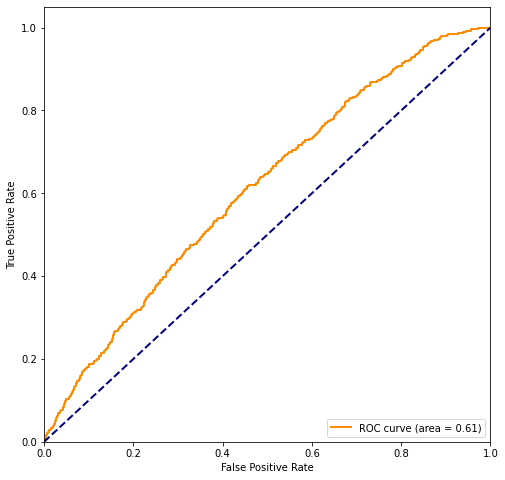

In [ ]:
roc_auc_score_plot(y_test, pred_proba_ec)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample_major = RandomUnderSampler(sampling_strategy='majority')
undersample = RandomUnderSampler(sampling_strategy=0.5)

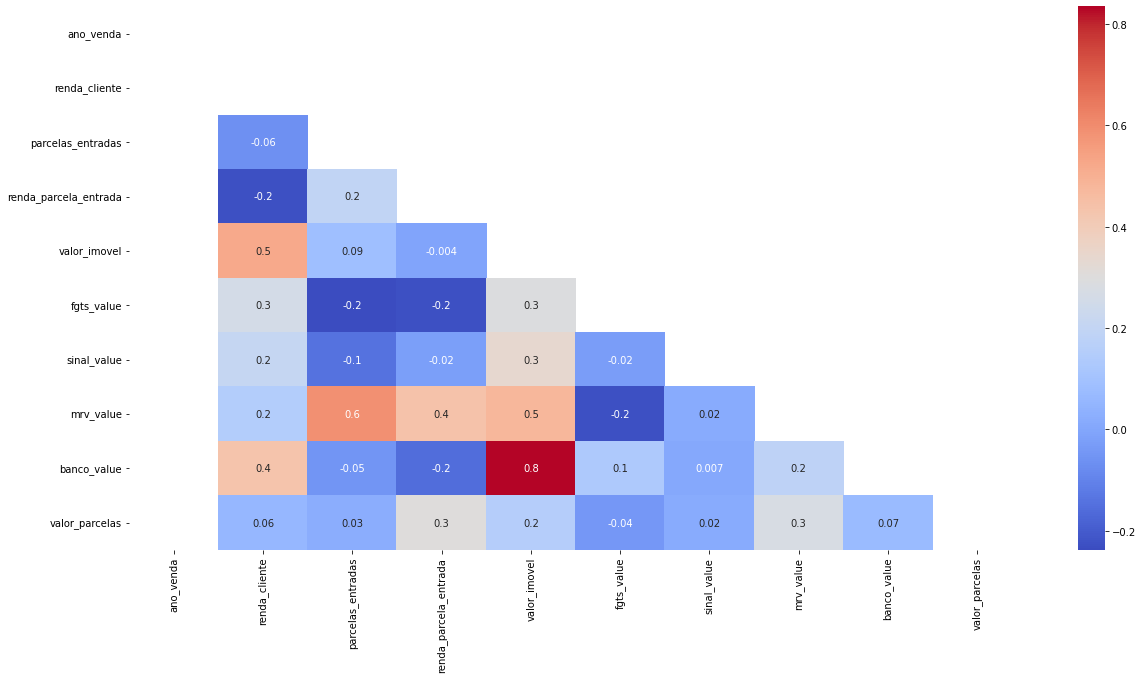

In [ ]:
corr_test_matrix = X_test.corr()

matrix = np.triu(corr_test_matrix)
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
plot = sns.heatmap(corr_test_matrix, cmap="coolwarm", annot = True, fmt=".1g", mask=matrix)
plot

In [ ]:
# example of random undersampling to balance the class distribution
from collections import Counter
# summarize class distribution
print(Counter(y_train))
# define undersample strategy
# fit and apply the transform
X_train_under, y_train_under = undersample_major.fit_resample(X_train, y_train)
X_test_under, y_test_under = undersample_major.fit_resample(X_test, y_test)
# summarize class distribution
print(Counter(y_train_under))
print(Counter(y_test_under))

Counter({0: 6801, 1: 2272})
Counter({0: 2272, 1: 2272})
Counter({0: 567, 1: 567})


In [ ]:
lr_under_model = LogisticRegression(random_state=42)
lr_under_model.fit(X_train_under[X_features].drop("valor_imovel", axis=1), y_train_under)

y_pred_under = lr_under_model.predict(X_test[X_features].drop("valor_imovel", axis=1))
pred_proba_under = lr_under_model.predict_proba(X_test[X_features].drop("valor_imovel", axis=1))

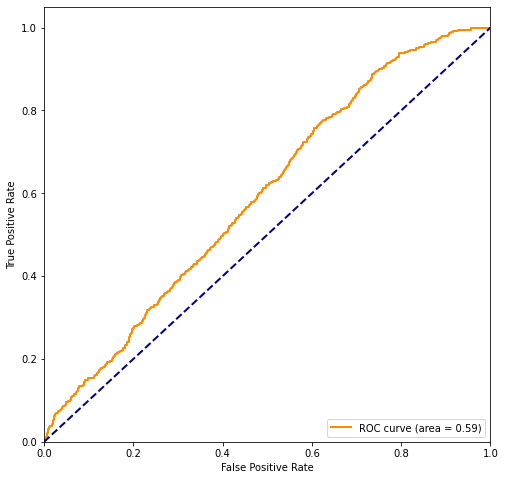

In [ ]:
roc_auc_score_plot(y_test, pred_proba_under)

In [ ]:
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57      3032
           1       0.19      0.72      0.30       567

    accuracy                           0.47      3599
   macro avg       0.54      0.57      0.43      3599
weighted avg       0.78      0.47      0.53      3599



## Hiperparametrização do modelo

In [ ]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset
# define model
model = LogisticRegression()
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=100, scoring='f1', n_jobs=-1, random_state=1)
search.fit(X_train_under[X_features].drop("valor_imovel", axis=1), y_train_under)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f487054fdf0>,
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=1, scoring='f1')

In [ ]:
# summarize result
print('Best Score: %s' % search.best_score_)
print('Best Hyperparameters: %s' % search.best_params_)

Best Score: 0.6523485291093463
Best Hyperparameters: {'C': 1.554938269564127e-05, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
lr_hyper = search.best_estimator_
lr_hyper.fit(X_train_under[X_features].drop("valor_imovel", axis=1), y_train_under)

y_pred_under = lr_under_model.predict(X_test[X_features].drop("valor_imovel", axis=1))
pred_proba_under = lr_under_model.predict_proba(X_test[X_features].drop("valor_imovel", axis=1))

print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57      3032
           1       0.19      0.72      0.30       567

    accuracy                           0.47      3599
   macro avg       0.54      0.57      0.43      3599
weighted avg       0.78      0.47      0.53      3599



In [ ]:
X_test["y_proba"] = pred_proba_under[:,1]

In [ ]:
X_test[X_test.y_proba > 0.75].mrv_value.sum()

3820819.0600000005

In [ ]:
df[(df["ano_venda"] == 2017) & (df["inadimplencia_cat"] == 1)].mrv_value.sum()

10375356.780000001

In [ ]:
X_test[X_test.y_proba < 0.60].mrv_value.sum()

37950905.32

In [ ]:
X_test[X_test["y_proba"] > 0.75].sort_values(by="y_proba", ascending=False)

,ano_venda,estado_civil,cidade,renda_cliente,parcelas_entradas,renda_parcela_entrada,valor_imovel,fgts_value,sinal_value,mrv_value,banco_value,valor_parcelas,y_proba
4956,2017,Solteiro,Belo Horizonte,2900.00,1,0.09,207000.00,14490.00,10350.00,66240.00,115920.00,66240.00,0.97
7653,2017,Solteiro,Maceió,1940.00,60,0.27,131896.00,0.00,0.00,30336.08,101559.92,505.60,0.79
4042,2017,Casado,Cambé,2200.00,60,0.23,137898.00,0.00,0.00,31716.54,106181.46,528.61,0.78
987,2017,Divorciado,Recife,2720.00,60,0.22,148010.00,0.00,0.00,37002.50,111007.50,616.71,0.78
7847,2017,Casado,Maceió,4060.00,60,0.14,145184.00,0.00,0.00,33392.32,111791.68,556.54,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6324,2017,Solteiro,UBERABA,2000.00,57,0.17,140498.00,0.00,0.00,19669.72,119423.30,345.08,0.75
4051,2017,Casado,Santa Bárbara D'Oeste,2207.00,58,0.26,152256.00,1522.56,1522.56,35018.88,114192.00,603.77,0.75
1904,2017,Casado,Goiânia,2622.00,59,0.12,134921.00,1349.21,1349.21,20238.15,110635.22,343.02,0.75
6081,2017,Viúvo,Patrocínio,2600.00,58,0.11,128000.00,0.00,1280.00,17920.00,108800.00,308.97,0.75


## e) Imagine que a solução da questão anterior está pronta. Como você aplicaria ela no negócio? Como você alteraria processos para comportar a solução? Quais atitudes deveriam ser tomadas para cada tipo de cliente?

- Com uma base de dados cada vez maior, seria necessário utilizar datawarehouses, como Databricks. 
- A maneira mais fácil e imediata de implementar o modelo seria através de uma API, que permitisse a flexibilidade de acessar os resultados do modelo pelos funcionários da companhia.
- O time de desenvolvimento poderia construir uma interface para input dos usuários, ou uma pipeline que alimentasse a API automaticamente.
- A API retornaria uma lista ordenada de clientes, baseado na probabilidade de inadimplência. Um threshold que pode ser estipulado, para fins ilustrativos seria o de 75%.
- Os times responsáveis adotariam uma série de estratégias para diminuir a probabilidade desses clientes de inadimplência, sendo elas ligação para o cliente, renegociação de parcelas, diminuição de juros e outros métodos que deixem o cliente mais confortável para pagar suas parcelas mensais.
- Uma métrica poderia ser estipulada pelos times responsáveis, com o o intuito de acompanhar de perto a taxa de inadimplência da empresa.
- Talvez possa-se pensar em estratégias variadas para cada grupo de clientes.
    - Entre 0% à 25%, um desconto nos juros ou nas parcelas.
    - Entre 25% à 40%, um desconto nos juros, e talvez um cashback.
    - Entre 40% à 60%, um email lembrando do pagamento das parcelas em dia, e enfatizando os benefícios acima.
    - Entre 60% à 75%, uma conversa no telefone para entender a dor do cliente, e buscar soluções razoáveis.
    - De 70% pra cima, uma conversa no telefone, e oportunidades de renegociação do valor das parcelas ou da dívida.

## f) Além da solução proposta anteriormente, para melhorar o controle na gestão de concessão de crédito e para aprimorar a concessão de crédito da MRV, visando reduzir o Risco de Crédito, o que você, com suas experiências e habilidades, poderia fazer? Seja específico(a) na suas propostas de solução.

- Primeiro, mais dados.

    - Os dados disponibilizados para a resolução do problema podem ser incrementados com uma variável temporal, sendo possível estimar a taxa de inadimplência dos próximos meses, por exemplo. Essa estratégia deixa uma visão mais clara para os times de negócio sobre alocação de investimentos nessa área, além de proporcionar a probabilidade de um planejamento preventivo.
    - Isto é, será possível acompanhar se a taxa de inadimplência diminuiu ou aumentou, dando a possibilidade de incrementar estratégias que estão trazendo bons resultados, e modificar as que não deram certo.
    - Outros dados do cliente também são importantes, como registro de pagamento das parcelas, score de crédito da Serasa, histórico de dívidas etc.

- Segundo, dar um passo atrás no processo.

    - Pelo entendimento dos dados, nota-se que no último ano registrado (2017) foram gastos mais de 10M de reais com clientes inadimplentes pela MRV.
    - É muito importante que esses clientes sejam analisados por um modelo desenvolvido pela empresa para concessão de crédito, com o intuito de diminuir o risco de gastar dinheiro sem retorno garantido.

- Terceiro, campanhas para cidades.
    - Foi visto na análise que existem cidades com um número absoluto de inadimplentes muito alto. Há cidades com mais de 60% de inadimplentes. Olhando por uma ótica local, talvez fazer campanhas localizadas de desconto em parcelas, renegociação de dívidas ou reparcelamento do valor do imóvel pode diminuir a taxa de inadimplência desses locais.